In [65]:
import pandas as pd 
import numpy as np 

In [66]:
df=pd.read_csv("Womens Clothing E-Commerce Reviews.csv",index_col="Clothing ID")

In [67]:
df

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
Clothing ID,,,,,,,,,
767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses


In [68]:
df.isnull().sum()

Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [69]:
df=df.dropna(subset = ['Division Name', 'Department Name','Class Name'])
df.isnull().sum()

Age                           0
Title                      3809
Review Text                 844
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64

In [70]:
import seaborn as sns

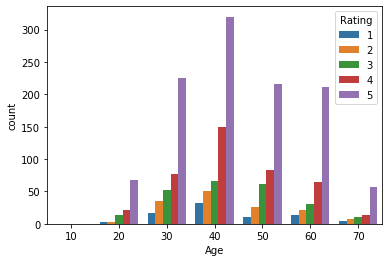

In [71]:
sns.countplot(x="Age",hue="Rating",data=df,order=[10,20,30,40,50,60,70])# age are taken in this order ok?

## IT shows that `Age` groups of `(30-50)` are most likely to shop and also gave `Good Rating`

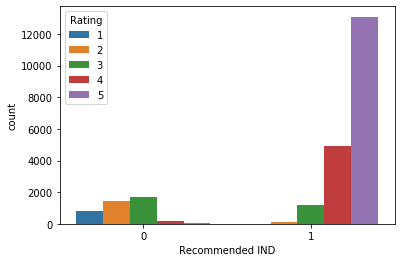

In [72]:
sns.countplot(x="Recommended IND",hue="Rating",data=df)

## IT shows that when the product is `Recommend` by other customers ,the product got `Good Rating`

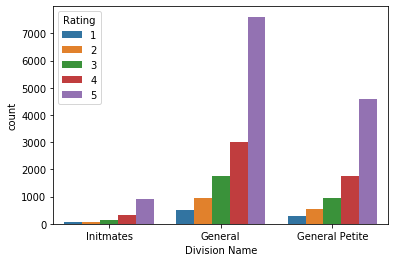

In [73]:
sns.countplot(x="Division Name",hue="Rating",data=df)

## `General` divison has `More Rating` when compared with other divisons

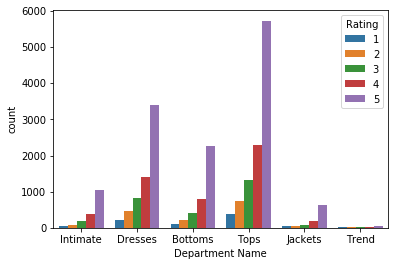

In [74]:
sns.countplot(x="Department Name",hue="Rating",data=df)

## `Tops` and `Dresses` are showing more sales than other `Departments`

In [75]:
np.unique(df["Class Name"])


array(['Blouses', 'Casual bottoms', 'Chemises', 'Dresses', 'Fine gauge',
       'Intimates', 'Jackets', 'Jeans', 'Knits', 'Layering', 'Legwear',
       'Lounge', 'Outerwear', 'Pants', 'Shorts', 'Skirts', 'Sleep',
       'Sweaters', 'Swim', 'Trend'], dtype=object)

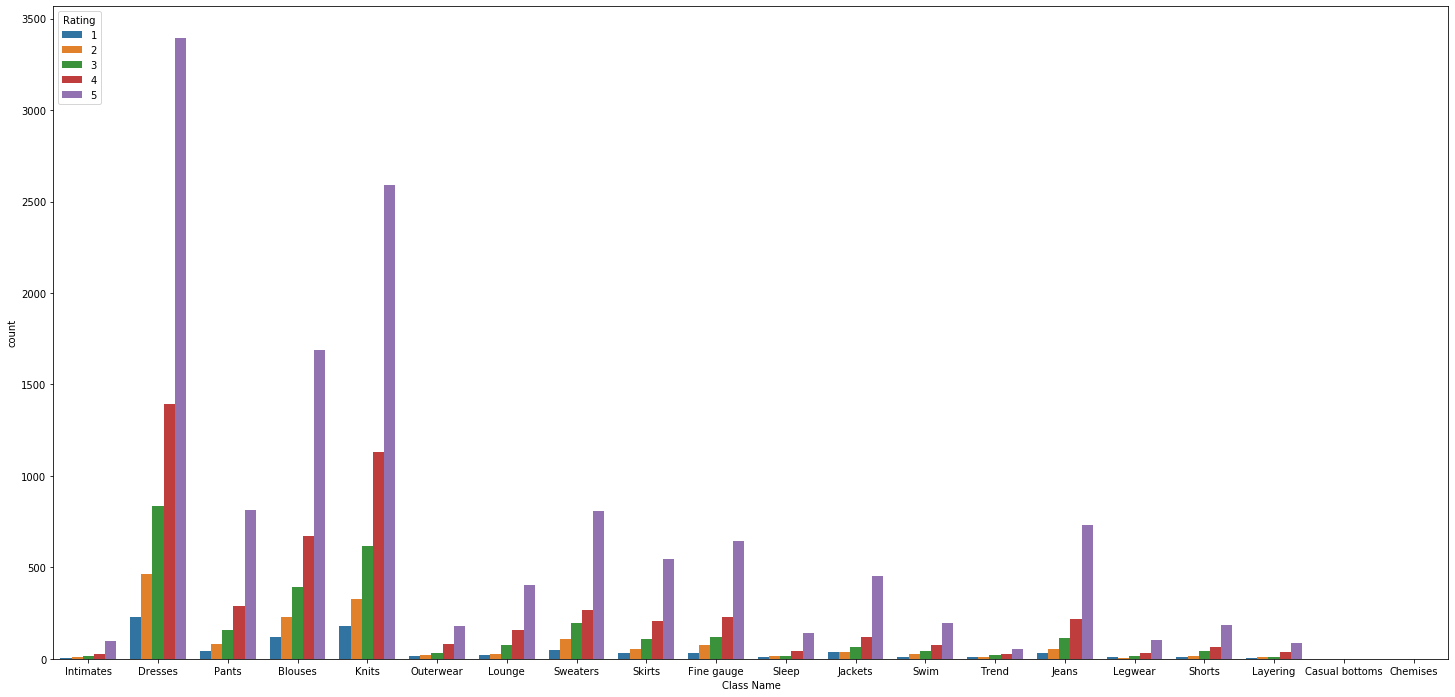

In [76]:
from matplotlib import pyplot as plt
import seaborn as sns    

plt.figure(figsize=(25,12))
sns.countplot(x="Class Name",hue="Rating",data=df)

## `Dresses` ,`Blouses` and `Knits` have more sales as well as `Good Rating`

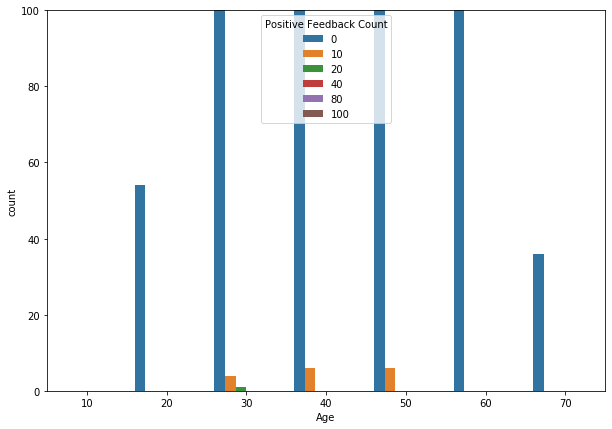

In [77]:
plt.figure(figsize=(10,7))
import matplotlib.pyplot as plt
plt.ylim(0,100)
sns.countplot(x="Age",hue="Positive Feedback Count",data=df,hue_order=[0,10,20,40,80,100],order=[10,20,30,40,50,60,70])


## IT shows that age around `(30-50)` are the only one giving `Feed Backs` and that to `Very Few`.

# `REVIEW` and `COMMENT` analysis

In [78]:
from nltk import sent_tokenize,word_tokenize
import pandas as pd
import numpy as np

In [94]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = ""  
    
    # traverse in the string   
    for ele in s:  
        str1 += ele   
    
    # return string   
    return str1

In [96]:
len(df['Review Text'])

23472

In [97]:
new1=[]
for i in range(len(df['Review Text'])):
    new.append(df["Review Text"][1])
    

In [108]:
new=str(new)
sen_token=sent_tokenize(new)
word_token=word_tokenize(listToString(sen_token))
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
new_pun=tokenizer.tokenize(new)
bad_chars=[';', ':', '!', '*', '[', ']', ')', '(', '0', '.', '-', "'", ',', "''",'1',',']
for i in bad_chars : 
    new = new.replace(i, '')

In [109]:
from nltk.corpus import stopwords
stop=set(stopwords.words("English"))
fil=[]
for w in word_token:
    if w not in stop:
        fil.append(w)

In [110]:
from nltk.probability import FreqDist
x=FreqDist(fil)

In [111]:
x.most_common(10)

[('1', 70428),
 ('tank', 46962),
 ('I', 23595),
 ('love', 23541),
 ('Name', 23520),
 ('Review', 23520),
 ('Text', 23520),
 ('dtype', 23520),
 ('object', 23520),
 ('comfortable', 23514)]

### analysis show that `love` and ` comfortable` are mosted used words incidicating positive feed back from customers

# step :3 converting the ratings into 2 classes 
## a. Class: Bad when Rating <=3
## b. Class: Good otherwise (4,5)

In [120]:
df.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
Clothing ID,,,,,,,,,
767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [121]:
df.replace({"Rating":[0,1,2,3]},0,inplace=True)
df.head()

C:\Users\kumar\Anaconda3\lib\site-packages\pandas\core\frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
Clothing ID,,,,,,,,,
767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,0,0,General,Dresses,Dresses
1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# Here Ratings from (0 to 3) are Converted into 0 (indicating Bad Class)

In [122]:
df.replace({"Rating":[4,5]},1,inplace=True)
df.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
Clothing ID,,,,,,,,,
767,33,NaN,Absolutely wonderful - silky and sexy and comf...,1,1,0,Initmates,Intimate,Intimates
1080,34,NaN,Love this dress! it's sooo pretty. i happene...,1,1,4,General,Dresses,Dresses
1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,0,0,General,Dresses,Dresses
1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1,1,0,General Petite,Bottoms,Pants
847,47,Flattering shirt,This shirt is very flattering to all due to th...,1,1,6,General,Tops,Blouses


# Here Ratings(4,5) are Converted into 1 (indicating Good Class)

# step 3: cleaning dataset

In [123]:
# here  Clothing ID,Title	,Review Text ( are text and they dont contribute in prediction )
# so we can drop them

In [124]:
df.reset_index(inplace=True)

In [125]:
df.drop(["Clothing ID","Title","Review Text"],axis=1,inplace=True)

C:\Users\kumar\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [126]:
df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,1,1,0,Initmates,Intimate,Intimates
1,34,1,1,4,General,Dresses,Dresses
2,60,0,0,0,General,Dresses,Dresses
3,50,1,1,0,General Petite,Bottoms,Pants
4,47,1,1,6,General,Tops,Blouses


In [127]:
# converting columns (Division Name	Department Name	Class Name) into categorical values

In [128]:
np.unique(df["Division Name"],return_counts=True)

(array(['General', 'General Petite', 'Initmates'], dtype=object),
 array([13850,  8120,  1502], dtype=int64))

In [129]:
df.replace(['General', 'General Petite', 'Initmates'],[0,1,2],inplace=True)# replacing them with corresponding values

In [130]:
df.head()# they are repalced

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,1,1,0,2,Intimate,Intimates
1,34,1,1,4,0,Dresses,Dresses
2,60,0,0,0,0,Dresses,Dresses
3,50,1,1,0,1,Bottoms,Pants
4,47,1,1,6,0,Tops,Blouses


In [131]:
np.unique(df["Department Name"],return_counts=True)

(array(['Bottoms', 'Dresses', 'Intimate', 'Jackets', 'Tops', 'Trend'],
       dtype=object),
 array([ 3799,  6319,  1735,  1032, 10468,   119], dtype=int64))

In [132]:
df.replace({"Department Name":['Bottoms', 'Dresses', 'Intimate', 'Jackets', 'Tops', 'Trend']},{"Department Name":[0,1,2,3,4,5]},inplace=True)# replacing them with corresponding values

C:\Users\kumar\Anaconda3\lib\site-packages\pandas\core\generic.py:6517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [133]:
df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,1,1,0,2,2,Intimates
1,34,1,1,4,0,1,Dresses
2,60,0,0,0,0,1,Dresses
3,50,1,1,0,1,0,Pants
4,47,1,1,6,0,4,Blouses


In [134]:
np.unique(df["Class Name"],return_counts=True)

(array(['Blouses', 'Casual bottoms', 'Chemises', 'Dresses', 'Fine gauge',
        'Intimates', 'Jackets', 'Jeans', 'Knits', 'Layering', 'Legwear',
        'Lounge', 'Outerwear', 'Pants', 'Shorts', 'Skirts', 'Sleep',
        'Sweaters', 'Swim', 'Trend'], dtype=object),
 array([3097,    2,    1, 6319, 1100,  154,  704, 1147, 4843,  146,  165,
         691,  328, 1388,  317,  945,  228, 1428,  350,  119], dtype=int64))

In [135]:
df.replace({"Class Name":['Blouses', 'Casual bottoms', 'Chemises', 'Dresses', 'Fine gauge',
        'Intimates', 'Jackets', 'Jeans', 'Knits', 'Layering', 'Legwear',
        'Lounge', 'Outerwear', 'Pants', 'Shorts', 'Skirts', 'Sleep',
        'Sweaters', 'Swim', 'Trend']},{"Class Name":[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]},inplace=True)# replacing them with corresponding values

In [136]:
df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,1,1,0,2,2,5
1,34,1,1,4,0,1,3
2,60,0,0,0,0,1,3
3,50,1,1,0,1,0,13
4,47,1,1,6,0,4,0


In [137]:
# every column value is converted into decimal format by which we can train the model

In [138]:
# importing required packages

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [140]:
# it is a supervised classification problem
# because we have target to find and it it has finite no of outputs 

In [141]:
df.isnull().sum()# we dont have any null values

Age                        0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [142]:
# splitting of x and y

In [143]:
x=df.drop("Rating",axis=1)

In [144]:
x.head()

,Age,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,1,0,2,2,5
1,34,1,4,0,1,3
2,60,0,0,0,1,3
3,50,1,0,1,0,13
4,47,1,6,0,4,0


In [145]:
x.values# making into 2 d array

array([[33,  1,  0,  2,  2,  5],
       [34,  1,  4,  0,  1,  3],
       [60,  0,  0,  0,  1,  3],
       ...,
       [31,  0,  1,  1,  1,  3],
       [28,  1,  2,  0,  1,  3],
       [52,  1, 22,  1,  1,  3]], dtype=int64)

In [146]:
y=df.Rating

In [147]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Rating, dtype: int64

In [148]:
y.values

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

# taking `LogisticRegression` algorithm 

In [149]:
log=LogisticRegression()

In [150]:
# splitting  the data into train and  test

In [151]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.3,random_state=1)

In [152]:
len(x_train),len(x_test),len(y_train),len(y_test)

(16430, 7042, 16430, 7042)

In [153]:
log.fit(x_train,y_train)

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [154]:
y_predict=log.predict(x_test)

In [155]:
accuracy_score(y_test,y_predict)

0.9348196535075263

In [156]:
# here we got accuracy more then 90 percent hence the model can be accepted 